<a href="https://colab.research.google.com/github/ayatkatka/bitcoin/blob/main/predict_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


In [11]:
dataset=pd.read_csv('bitcoin.csv')


In [12]:
dataset.head()

,Date,Open,High,Low,Closing,Adj Close,Volume
0,06/09/2023,25772.6,25846.0,25708.6,25721.9,25721.9,1.025276e+10
1,05/09/2023,25815.0,25858.4,25590.0,25780.0,25780.0,1.109474e+10
2,04/09/2023,25968.2,26081.5,25657.0,25812.4,25812.4,1.068064e+10
3,03/09/2023,25869.5,26087.1,25817.0,25969.6,25969.6,8.962525e+09
4,02/09/2023,25800.9,25970.3,25753.1,25868.8,25868.8,1.010039e+10


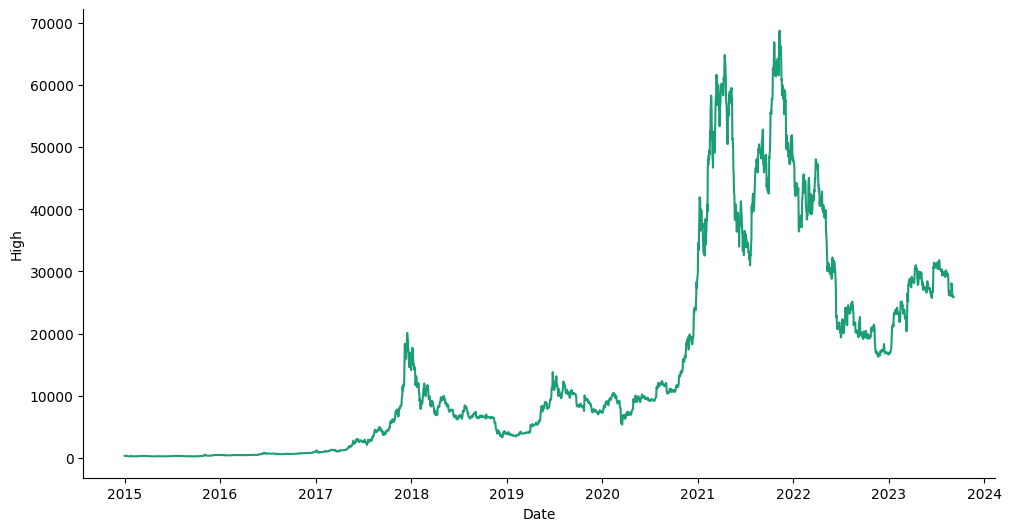

In [75]:
# @title Date vs High

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

In [17]:
dataset['Date'] = pd.to_datetime(dataset.Date, format="%d/%m/%Y")

In [18]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [16]:
dataset.shape

(3171, 7)

In [19]:
dataset.drop('Adj Close',axis = 1, inplace = True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [20]:
dataset.isnull().sum()

Date       0
Open       0
High       0
Low        0
Closing    0
Volume     0
dtype: int64

In [21]:
dataset.isna().any()

Date       False
Open       False
High       False
Low        False
Closing    False
Volume     False
dtype: bool

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3171 non-null   datetime64[ns]
 1   Open     3171 non-null   float64       
 2   High     3171 non-null   float64       
 3   Low      3171 non-null   float64       
 4   Closing  3171 non-null   float64       
 5   Volume   3171 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 148.8 KB


In [23]:
dataset.describe()

,Date,Open,High,Low,Closing,Volume
count,3171,3171.000000,3171.000000,3171.000000,3171.000000,3.171000e+03
mean,2019-05-05 00:00:00,14332.172438,14674.382971,13956.291990,14338.796279,1.706365e+10
min,2015-01-01 00:00:00,176.900000,211.700000,171.500000,178.100000,7.860650e+06
25%,2017-03-03 12:00:00,1068.200000,1110.850000,1043.950000,1075.900000,2.564590e+08
50%,2019-05-05 00:00:00,8221.600000,8371.200000,8005.300000,8222.100000,1.217532e+10
75%,2021-07-05 12:00:00,22287.350000,22661.450000,21625.400000,22358.000000,2.787545e+10
max,2023-09-06 00:00:00,67549.700000,68789.600000,66382.100000,67566.800000,3.510000e+11
std,NaN,16065.030106,16460.429923,15612.282239,16061.184398,1.943969e+10


In [24]:
print(len(dataset))

3171


In [69]:
dataset['Date'] = pd.to_datetime(dataset.Date, format="%d/%m/%Y")

<Axes: >

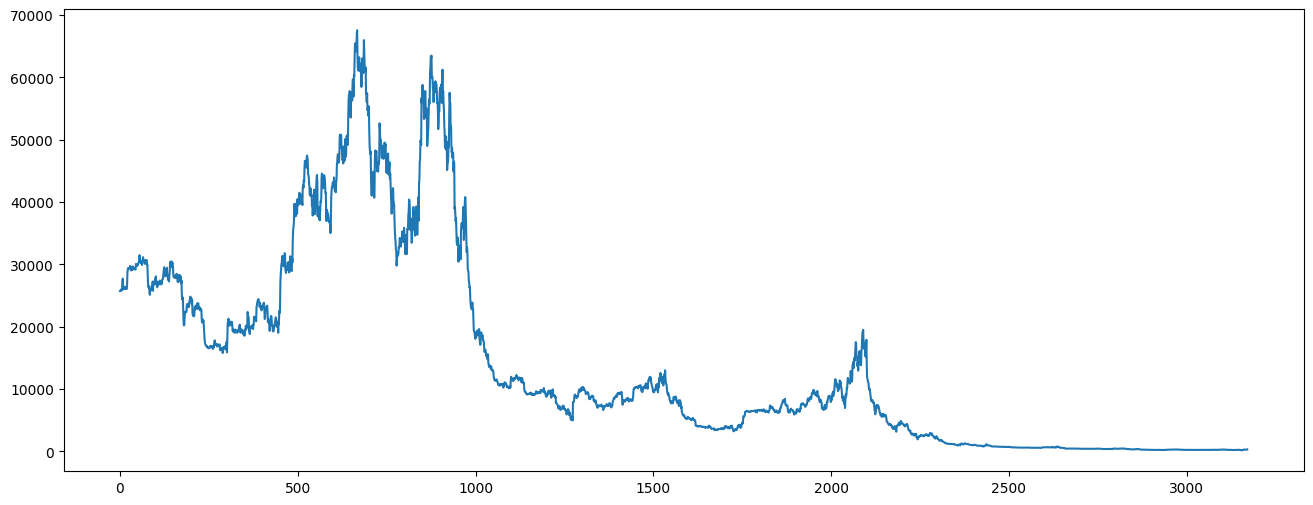

In [70]:
dataset['Closing'].plot(figsize=(16,6))

KeyError: 'Adj Close'

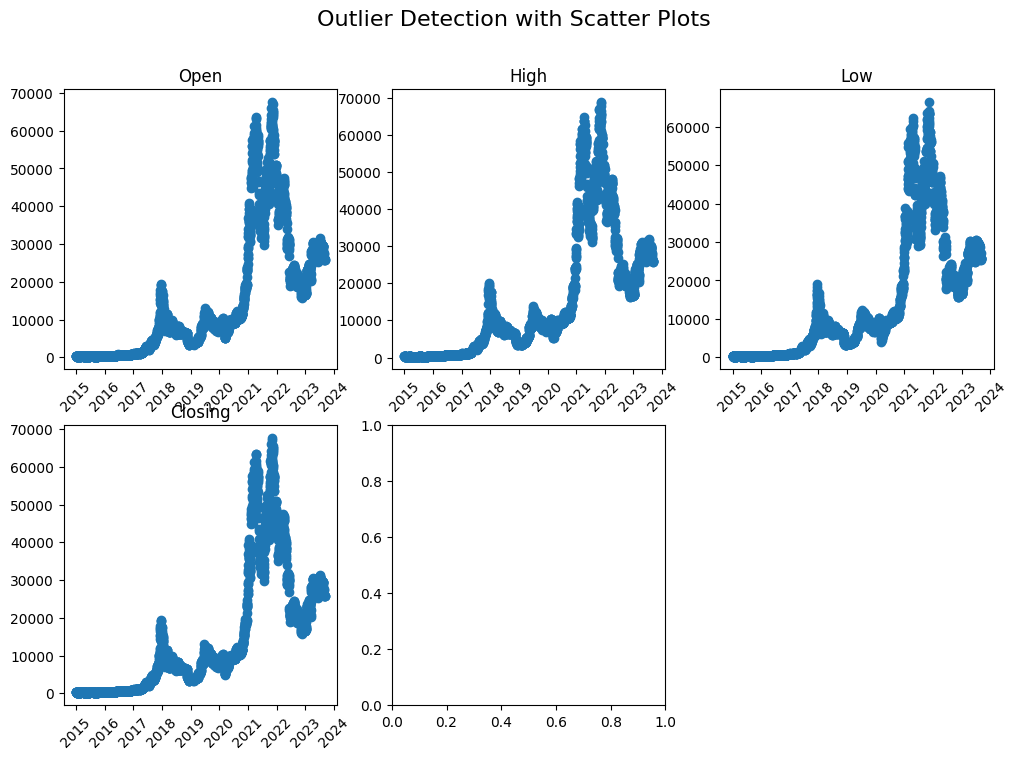

In [80]:

# Load the datas
# Convert 'Date' to datetime with the correct format
dataset['Date'] = pd.to_datetime(dataset['Date'], dayfirst=True)

# Plotting outliers using scatter plots
plt.figure(figsize=(12, 8), facecolor='white')
plt.suptitle('Outlier Detection with Scatter Plots', fontsize=16)

# Subplots for each feature
plt.subplot(2, 3, 1)
plt.scatter(dataset['Date'], dataset['Open'])
plt.title('Open')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
plt.scatter(dataset['Date'], dataset['High'])
plt.title('High')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
plt.scatter(dataset['Date'], dataset['Low'])
plt.title('Low')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
plt.scatter(dataset['Date'], dataset['Closing'])
plt.title('Closing')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
plt.scatter(dataset['Date'], dataset['Adj Close'])
plt.title('Adj Close')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
plt.scatter(dataset['Date'], dataset['Volume'])
plt.title('Volume')
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [28]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Closing']

In [29]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [30]:
X_train.shape

(2378, 4)

In [31]:
X_test.shape

(793, 4)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [33]:
regressor.fit(X_train,y_train)

LinearRegression()

In [82]:
new_var = print(regressor.coef_)


[-5.38066606e-01  9.08735533e-01  6.24241254e-01  3.12406878e-10]


In [35]:
print(regressor.intercept_)

-0.6882659290713491


In [36]:
predicted=regressor.predict(X_test)

In [37]:
print(X_test)

         Open     High      Low        Volume
316   19345.0  20348.4  19261.4  4.776152e+10
1262   5831.4   6443.9   5785.0  4.649192e+10
1180   9480.7   9493.2   9396.0  1.756432e+10
1677   3484.6   3523.3   3467.6  5.071624e+09
1783   6478.1   6493.7   6445.3  3.578870e+09
...       ...      ...      ...           ...
215   23469.4  23678.1  23280.0  2.708307e+10
2890    243.1    244.3    242.2  1.851530e+07
2962    293.6    296.6    293.4  2.545360e+07
2739    407.8    415.9    406.3  8.576240e+07
392   23162.9  24127.4  22771.5  3.283743e+10

[793 rows x 4 columns]


In [38]:
predicted.shape

(793,)

In [39]:
dframe=pd.DataFrame(y_test,predicted)

In [40]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [41]:
print(dfr)

       Actual     Predicted
316   20095.9  20120.408864
1262   6416.3   6343.191073
1180   9475.3   9395.729855
1677   3521.1   3492.316122
1783   6465.4   6439.258597
...       ...           ...
215   23449.3  23429.139466
2890    242.3    241.708849
2962    294.4    294.026673
2739    414.3    411.487294
392   23947.6  23686.722782

[793 rows x 2 columns]


In [42]:
dfr.head(25)

,Actual,Predicted
316,20095.9,20120.408864
1262,6416.3,6343.191073
1180,9475.3,9395.729855
1677,3521.1,3492.316122
1783,6465.4,6439.258597
2990,263.1,264.236115
1758,6359.5,6342.524010
3021,233.3,232.025712
867,51762.3,52973.684669
2985,271.9,269.936874


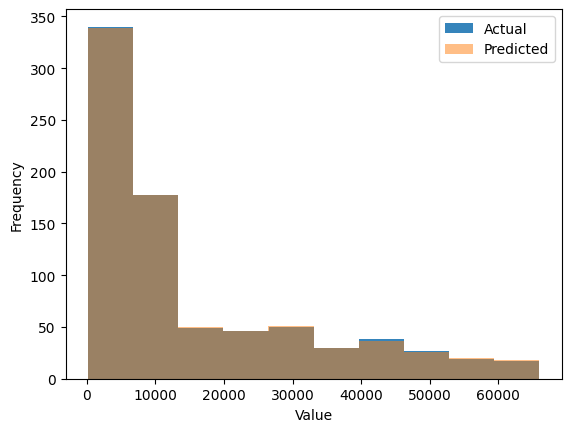

In [67]:
# @title Distribution of Actual vs Predicted

import matplotlib.pyplot as plt
plt.hist(dfr['Actual'], alpha=0.9, label='Actual')
plt.hist(dfr['Predicted'], alpha=0.5, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
_ = plt.legend()

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [44]:
regressor.score(X_test,y_test)

0.9995428711257078

In [45]:
import math

In [46]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 159.7927616613566


In [47]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 130230.4544211832


In [48]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 360.87456882022485


In [49]:
graph=dfr.head(20)

<Axes: >

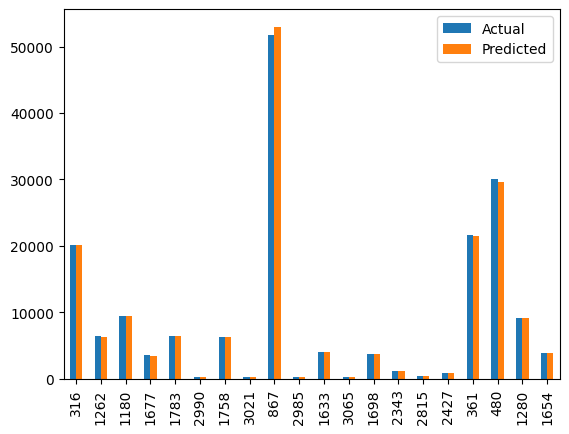

In [60]:
graph.plot(kind='bar')